####  Logistic Regression using  IRIS Data
Logit Function
$ \frac {p(x)}{1-p(X)} = \beta_0 + \beta_1 \ X$



In [50]:
from sklearn import datasets
import numpy as np
import seaborn

iris=datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [55]:
X=iris["data"][:,3] #petal width
y=(iris['target'] ==2).astype(np.int) # 1 if Iris-Virginica,else 0

/var/folders/h7/7cnm33m55zqb3ckcp7485gfw0000gn/T/ipykernel_49896/1151255317.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y=(iris['target'] ==2).astype(np.int) # 1 if Iris-Virginica,else 0


In [56]:
X=np.array(X)[:,np.newaxis]
X=np.concatenate((np.ones((np.shape(X)[0],1)),X),axis=1)
X.shape

(150, 2)

In [57]:
y=np.array(y)[:,np.newaxis]
y.shape

(150, 1)

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X,y.ravel())

LogisticRegression()

In [60]:
X_new =np.linspace(0,3,1000)[:,np.newaxis]
X_new1=np.concatenate((np.ones((np.shape(X_new)[0],1)),X_new),axis=1)
y_proba=logistic_reg.predict_proba(X_new1)

In [61]:
y_proba.shape

(1000, 2)

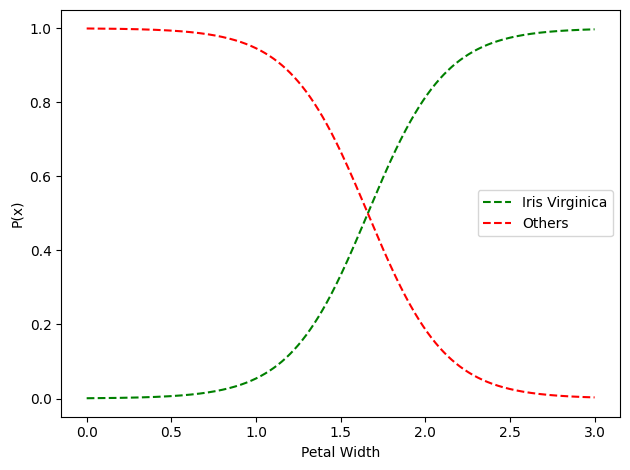

In [62]:
import matplotlib.pyplot as plt
plt.plot(X_new,y_proba[:,1], "g--")
plt.plot(X_new,y_proba[:,0], "r--")
plt.xlabel('Petal Width')
plt.ylabel('P(x)')
plt.legend(["Iris Virginica", "Others"], loc=7)
plt.tight_layout()
plt.show()

In [63]:
X=iris["data"][:,(2,3)]
y=iris["target"]

In [65]:
softmax_reg=LogisticRegression(multi_class = "multinomial",solver="lbfgs",C=10)

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [67]:
softmax_reg.fit(X_train,y_train)


LogisticRegression(C=10, multi_class='multinomial')

In [68]:
y_pred_test=softmax_reg.predict(X_test)

In [69]:
y_pred_test

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2,
       0])

In [70]:
np.unique(y)

array([0, 1, 2])

In [71]:
y_pred_test1= iris["target_names"][y_pred_test]

In [72]:
import pandas as pd
df=pd.DataFrame()

In [74]:
df["petal len"] =X_test[:,0]

In [75]:
df["petal wid"] =X_test[:,1]

In [76]:
df["species"]=y_pred_test1

<AxesSubplot:xlabel='petal len', ylabel='petal wid'>

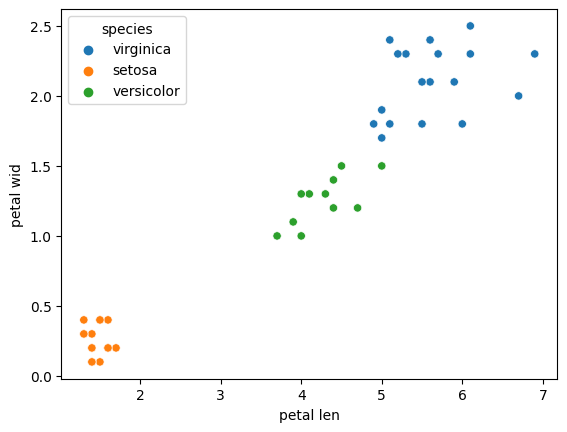

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x="petal len",y="petal wid",data=df,hue="species")

In [78]:
confusion_df = pd.DataFrame()

In [79]:
confusion_df['True Label'] = iris["target_names"][y_test]
confusion_df['Predicted Label']=iris["target_names"][y_pred_test]

In [80]:
confusion_df.head()

,True Label,Predicted Label
0,virginica,virginica
1,setosa,setosa
2,virginica,virginica
3,setosa,setosa
4,virginica,virginica


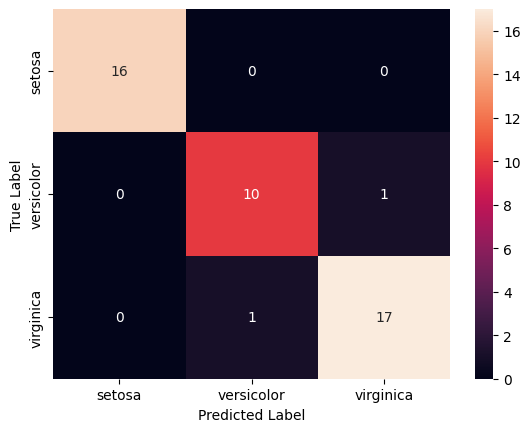

In [81]:
confusion_matrix = pd.crosstab(confusion_df['Predicted Label'],confusion_df['True Label'], rownames=['True Label'], colnames=['Predicted Label'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [83]:
from sklearn.datasets import load_wine

dataset = load_wine()
X = dataset.data
y = dataset.target
list(dataset.keys())

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [85]:
softmax_reg=LogisticRegression(multi_class = "multinomial",solver="lbfgs",C=10)

In [86]:
softmax_reg.fit(X_train,y_train)

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, multi_class='multinomial')

In [87]:
y_pred_test=softmax_reg.predict(X_test)

In [88]:
confusion_df = pd.DataFrame()

In [89]:
confusion_df['True Label'] = dataset["target_names"][y_test]
confusion_df['Predicted Label']=dataset["target_names"][y_pred_test]

In [90]:
confusion_df.head()

,True Label,Predicted Label
0,class_1,class_1
1,class_2,class_2
2,class_0,class_0
3,class_1,class_0
4,class_2,class_2


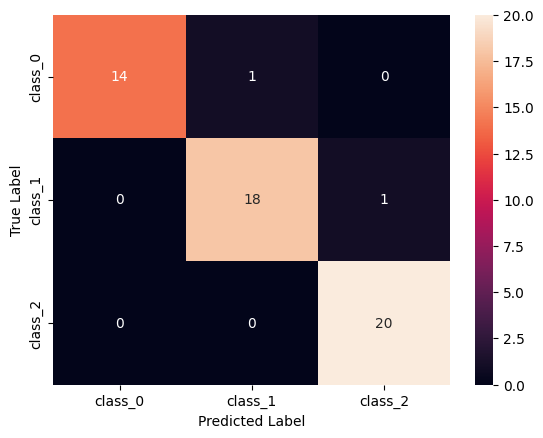

In [91]:
confusion_matrix = pd.crosstab(confusion_df['Predicted Label'],confusion_df['True Label'], rownames=['True Label'], colnames=['Predicted Label'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [92]:
print(confusion_matrix)

Predicted Label  class_0  class_1  class_2
True Label                                
class_0               14        1        0
class_1                0       18        1
class_2                0        0       20


In [93]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_test, target_names=['Class_0', 'Class_1', 'Class_2']))
print("column support refers to the number of data points in those classes")


Classification Report

              precision    recall  f1-score   support

     Class_0       0.93      1.00      0.97        14
     Class_1       0.95      0.95      0.95        19
     Class_2       1.00      0.95      0.98        21

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.96      0.96      0.96        54

column support refers to the number of data points in those classes


In [94]:
from sklearn.datasets import load_digits
digits = load_digits()

In [95]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print(str('Image Data Shape = ')+str(digits.data.shape))
          # Print to show there are 1797 labels (integers from 0–9)
print(str('Label Data Shape = ')+str(digits.target.shape))

Image Data Shape = (1797, 64)
Label Data Shape = (1797,)


In [103]:
digits.data[90].reshape(8,8), digits.target[90]

(array([[ 0.,  0.,  0.,  1., 12.,  8.,  1.,  0.],
        [ 0.,  0.,  0.,  4., 16., 16.,  1.,  0.],
        [ 0.,  0.,  1., 13., 16., 11.,  0.,  0.],
        [ 0.,  1., 11., 16., 16., 12.,  0.,  0.],
        [ 0.,  2., 12.,  8., 16., 10.,  0.,  0.],
        [ 0.,  0.,  0.,  0., 15.,  8.,  0.,  0.],
        [ 0.,  0.,  0.,  4., 16.,  4.,  0.,  0.],
        [ 0.,  0.,  0.,  3., 13.,  4.,  0.,  0.]]),
 1)

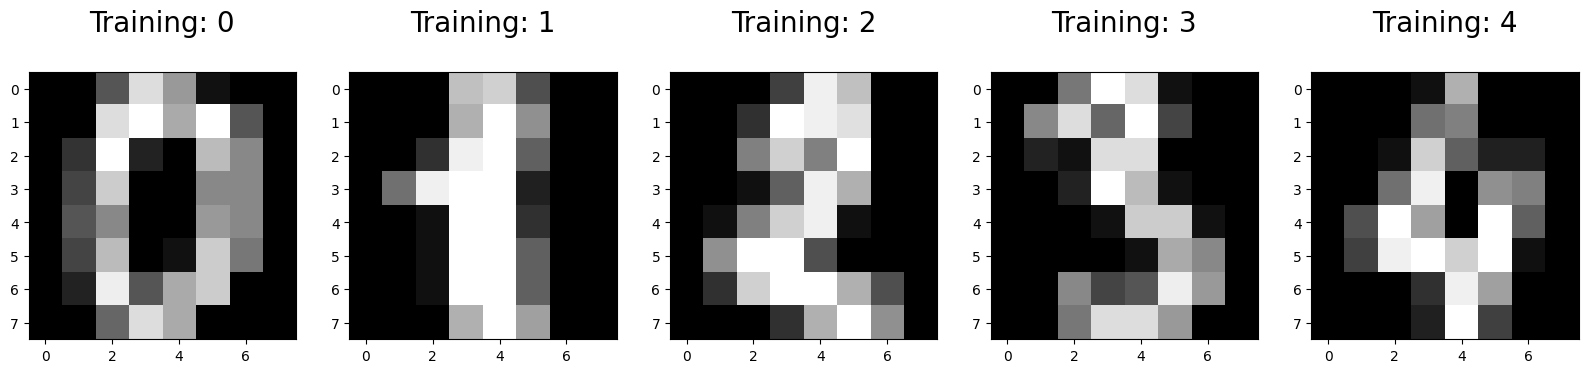

In [104]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)


In [105]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [121]:
logisticRegr = LogisticRegression(solver="lbfgs",C=10)

In [122]:
logisticRegr.fit(x_train, y_train)

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10)

In [123]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1,-1))

array([2])

In [129]:
logisticRegr.predict_proba(x_test[0].reshape(1,-1))

array([[1.54129634e-21, 1.90778613e-19, 1.00000000e+00, 2.82004089e-16,
        4.54840035e-25, 4.25474588e-17, 2.33955152e-27, 2.10568301e-15,
        1.41901587e-17, 8.23494282e-24]])

In [124]:
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [125]:
predictions = logisticRegr.predict(x_test)

In [126]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


In [127]:
import matplotlib.pyplot as plt

In [128]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 41  2  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  2 44]]
